In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal

In [4]:
def lpf(data,sampling_rate,fp=5):
  n=len(data)
  dt=1/sampling_rate
  fn=1/(2*dt)
  fp = fp  # 通過域端周波数[Hz]
  fs =fp+2  # 阻止域端周波数[Hz]
  gpass = 1  # 通過域最大損失量[dB]
  gstop = 40  # 阻止域最小減衰量[dB]
  # 正規化
  Wp = fp/fn
  Ws = fs/fn
  N, Wn = signal.buttord(Wp, Ws, gpass, gstop)
  b1, a1 = signal.butter(N, Wn, 'low')
  return signal.filtfilt(b1, a1, data) #0 paddingしない場合

def lpf_all(df,sampling_rate,fp):
  df_return = pd.DataFrame()
  for dd in df:
    df_return[dd]=lpf(df[dd],sampling_rate,fp)
  return df_return


In [25]:
def view_data(data_path,sampling_rate,fp):
  data = pd.read_csv(data_path)
  data['time'] = np.arange(len(data))/sampling_rate
  # data processed
  data_processed=lpf_all(data,sampling_rate,fp)
  # plot
  fig,ax = plt.subplots(2,2,figsize=(16,9))
  fig.suptitle(data_path)
  ax[0][0].plot(data['time'],data['left'])
  ax[0][0].set_title('row left')
  ax[0][0].set_ylim(0,3000)
  ax[0][1].plot(data['time'],data['right'])
  ax[0][1].set_title('row right')
  ax[0][1].set_ylim(0,3000)
  ax[1][0].plot(data_processed['time'],data_processed['left'])
  ax[1][0].set_title('processed left')
  ax[1][0].set_ylim(0,3000)
  ax[1][1].plot(data_processed['time'],data_processed['right'])
  ax[1][1].set_title('processed right')
  ax[1][1].set_ylim(0,3000)
  fig.tight_layout(rect=[0,0,1,0.96])
  plt.show()

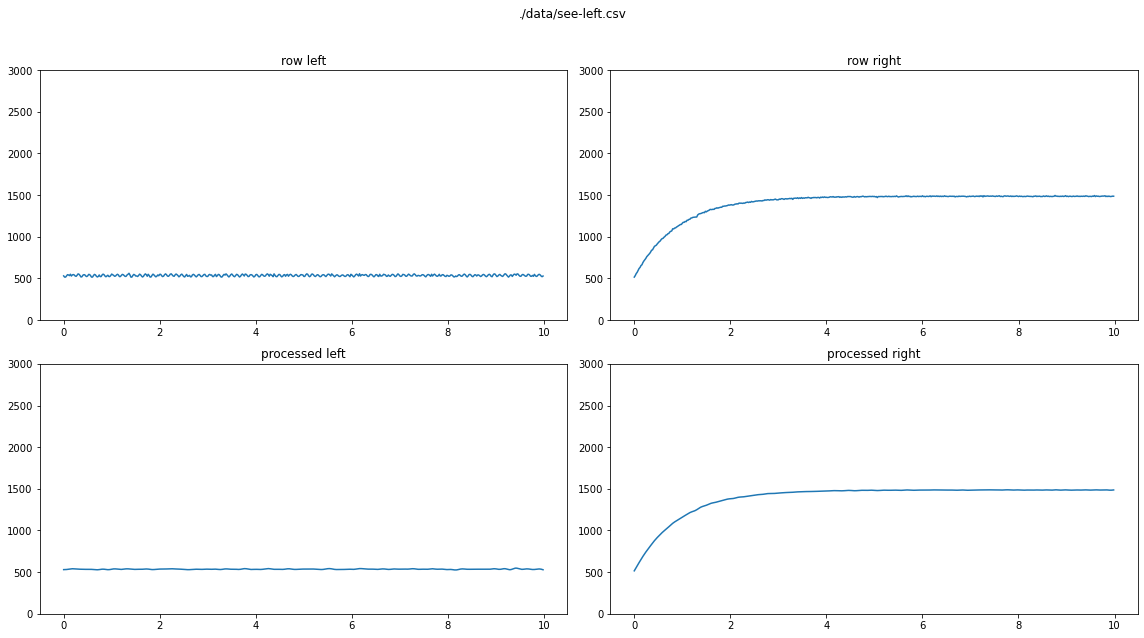

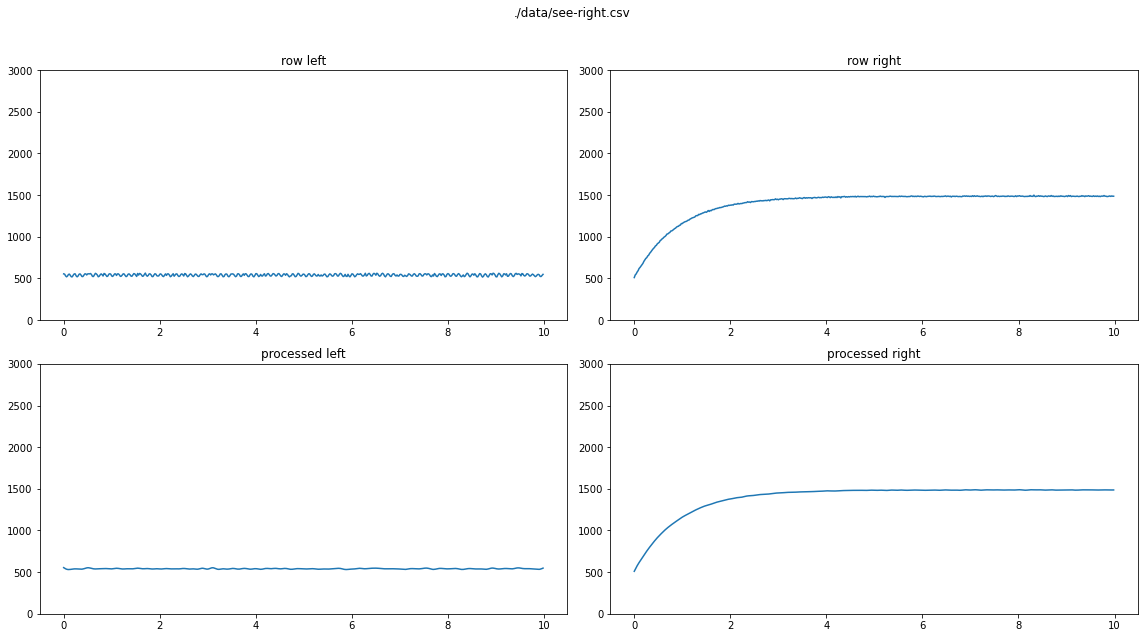

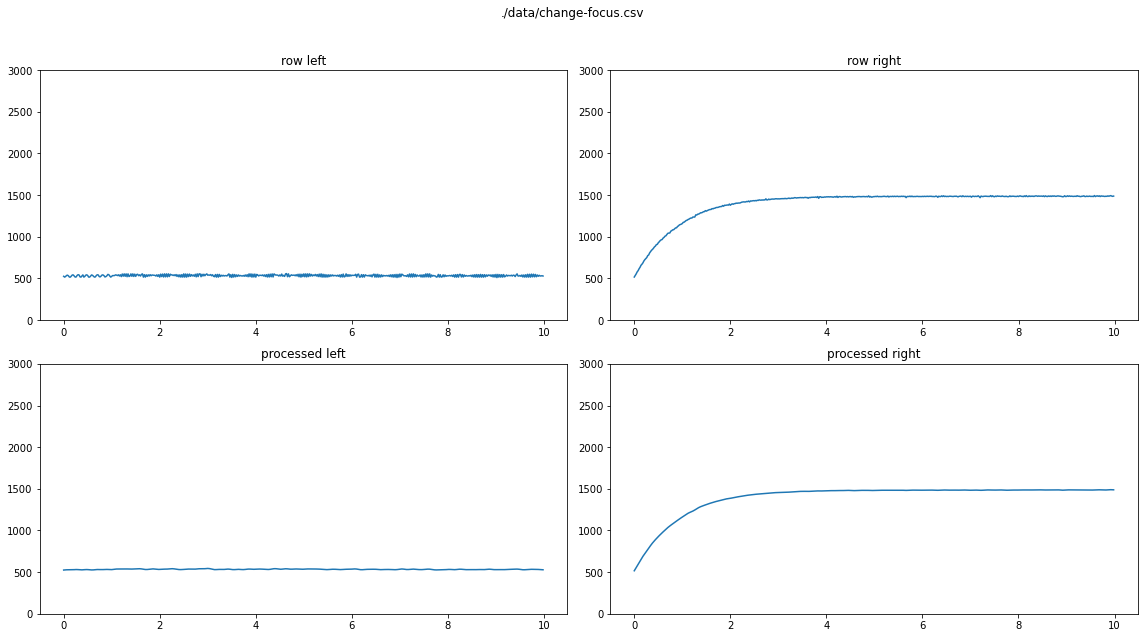

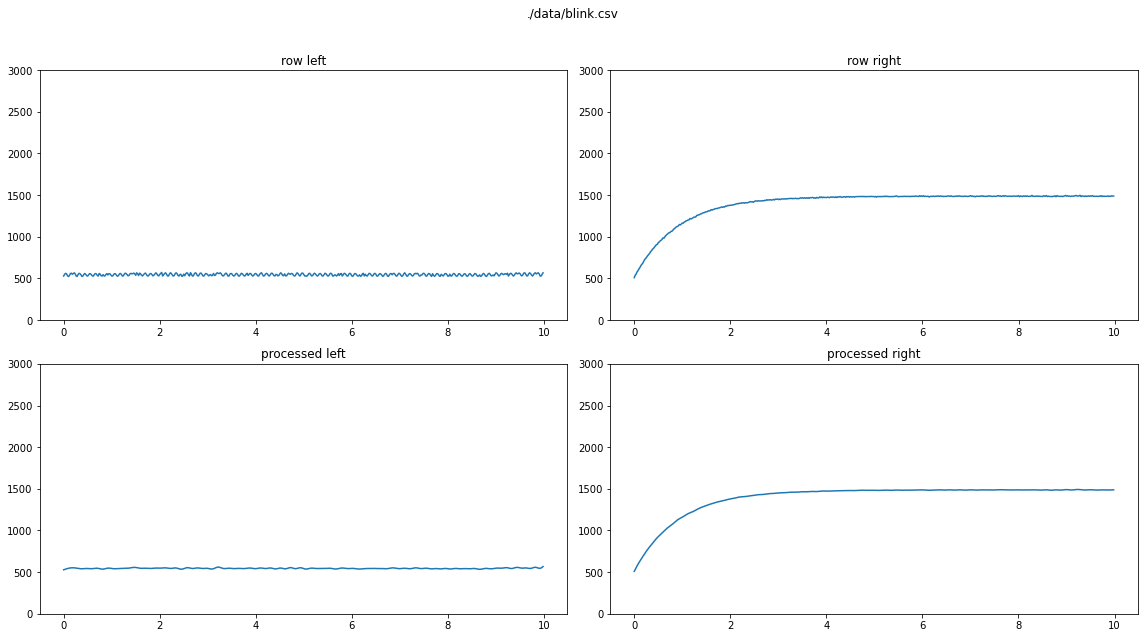

In [26]:
view_data('./measured-data/see-left.csv',50,5)
view_data('./measured-data/see-right.csv',50,5)
view_data('./measured-data/change-focus.csv',50,5)
view_data('./measured-data/blink.csv',50,5)